# 1d radially symmetric solution

This notebook is to facilitate running the `1drad` code and looking at the resulting plots.


In [1]:
%matplotlib inline
from pylab import *

Check that the CLAW environment variable is set.  (It must be set in the Unix shell before starting the notebook server).

In [2]:
import os
try:
    CLAW = os.environ['CLAW'] 
    print("Using Clawpack from ", CLAW)
except:
    print("*** Environment variable CLAW must be set to run code")

Using Clawpack from  /Users/rjl/git/clawpack


### Module with functions used to execute system commands and capture output:

In [3]:
from clawpack.clawutil import nbtools
from clawpack.visclaw import animation_tools
from IPython.display import HTML, Image

#### Set the figsize

You might want to adjust this depending on the size of your browser window.

In [4]:
width_image = 400
figsize_animation = (3,4)

### Inline animations:

Using `anim.to_jshtml()` gives animations similar to what you see in the html files if you do `make plots`, but you may prefer the `anim.to_html5_video()` option.  See the [matplotlib.animation.Animation documentation](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.animation.Animation.html) for more information, also on how to save an animation as a separate file.

In [5]:
def show_anim(anim):
    html_version = HTML(anim.to_jshtml())
    #html_version = HTML(anim.to_html5_video())
    return html_version

## Create reference solution by running 1d code

We first have to run the code in the subdirectory `1drad` to create the "reference solution" used in the scatter plots.  

This is a bit clumsy to do in the notebook!

### Compile the code:

In [6]:
nbtools.make_exe(new=True)  # new=True ==> force recompilation of all code

Executing shell command:   make new
Done...  Check this file to see output:


/Users/rjl/git/amath574w2023/homeworks/hw6/radialdam/1drad/compile_output.txt

### Run the code and plot results using the setrun.py and setplot.py files in this directory:

First create data files needed for the Fortran code, using parameters specified in setrun.py, and then run the code and produce plots. Specifying a label insures the resulting plot directory will persist after later runs are done below.

In [13]:
nbtools.make_data(verbose=False)
outdir,plotdir = nbtools.make_output_and_plots(label='1')

Executing shell command:   make output OUTDIR=_output_1
Done...  Check this file to see output:


/Users/rjl/git/amath574w2023/homeworks/hw6/radialdam/1drad/run_output_1.txt

Executing shell command:   make plots OUTDIR=_output_1 PLOTDIR=_plots_1
Done...  Check this file to see output:


/Users/rjl/git/amath574w2023/homeworks/hw6/radialdam/1drad/plot_output_1.txt

View plots created at this link:


/Users/rjl/git/amath574w2023/homeworks/hw6/radialdam/1drad/_plots_1/_PlotIndex.html

#### Show one frame of the solution:

In [14]:
frameno = 4

displaying _plots_1/frame0004fig1.png


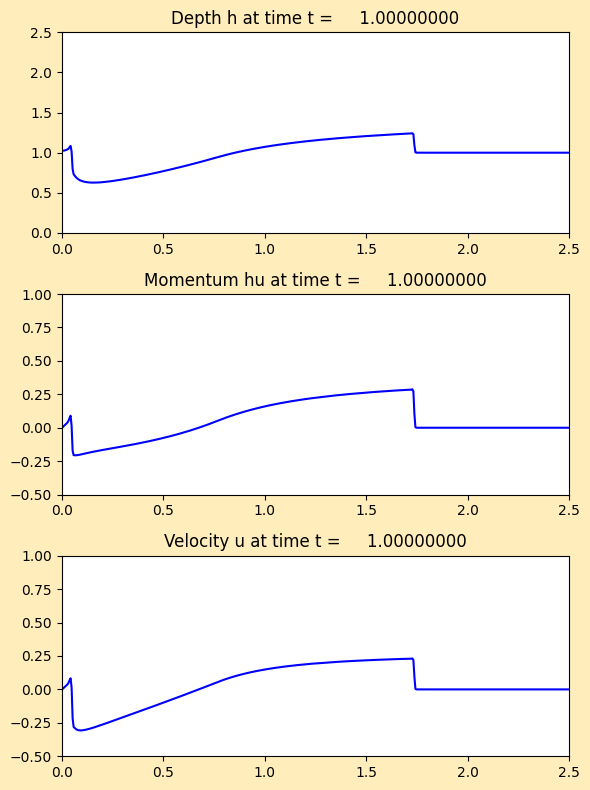

In [15]:
png_file = '%s/frame%sfig1.png' % (plotdir, str(frameno).zfill(4))
print('displaying %s' % png_file)
Image(png_file, width=width_image)

### Display an animation inline:

Clicking on the `_PlotIndex` link above, you can view an animation of the results. (This might not work if you run into permission problems with the notebook accessing this webpage.)

After creating all png files in the `_plots` directory, these can also be combined in an animation that is displayed inline:

In [16]:
anim = animation_tools.animate_from_plotdir(plotdir,figno=1,
                                            figsize=figsize_animation);
show_anim(anim)